In [16]:
import pandas as pd
df = pd.read_csv('/payment_data.csv')
df.head(10)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
5,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016
6,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN
7,54987756,0,0,0,0,2,1,NaN,02/12/2016,365331.6,304943.0,NaN
8,58988028,0,0,0,0,4,0,NaN,02/12/2016,16795.2,28500.0,19/04/2016
9,58993180,0,0,0,0,3,6,NaN,02/12/2016,26688.0,31300.0,20/03/2016


In [17]:
df.shape

(8250, 12)

In [18]:
df.columns.tolist()

['id',
 'OVD_t1',
 'OVD_t2',
 'OVD_t3',
 'OVD_sum',
 'pay_normal',
 'prod_code',
 'prod_limit',
 'update_date',
 'new_balance',
 'highest_balance',
 'report_date']

In [19]:
df.dtypes

,0
id,int64
OVD_t1,int64
OVD_t2,int64
OVD_t3,int64
OVD_sum,int64
pay_normal,int64
prod_code,int64
prod_limit,float64
update_date,object
new_balance,float64


In [20]:
df.isnull().sum()

,0
id,0
OVD_t1,0
OVD_t2,0
OVD_t3,0
OVD_sum,0
pay_normal,0
prod_code,0
prod_limit,6118
update_date,26
new_balance,0


In [33]:
df.fillna({'prod_limit':df['prod_limit'].median()},inplace=True)
df.fillna({'update_date':df['update_date'].mode()[0]},inplace=True)
df.fillna({'highest_balance':df['highest_balance'].median()},inplace=True)
df.fillna({'report_date':df['report_date'].mode()[0]},inplace=True)

In [36]:
df.isnull().sum()

,0
id,0
OVD_t1,0
OVD_t2,0
OVD_t3,0
OVD_sum,0
pay_normal,0
prod_code,0
prod_limit,0
update_date,26
new_balance,0


In [37]:
df.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8224,8.250000e+03,8.250000e+03,8250
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,72745.605467,2012-02-12 10:27:11.906614784,1.054042e+05,2.105192e+05,2014-08-24 05:55:32.945454592
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1988-07-19 00:00:00,-4.030320e+04,5.010000e+02,1996-02-24 00:00:00
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,68200.000000,2009-02-10 06:00:00,0.000000e+00,2.449925e+04,2014-05-18 06:00:00
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,2013-06-17 12:00:00,0.000000e+00,4.404700e+04,2015-09-21 00:00:00
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,68200.000000,2015-01-27 00:00:00,2.494800e+04,1.005000e+05,2016-01-18 00:00:00
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,2016-12-04 00:00:00,1.632120e+08,1.800005e+08,2016-12-06 00:00:00
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,38564.134668,NaN,1.887704e+06,2.744138e+06,NaN


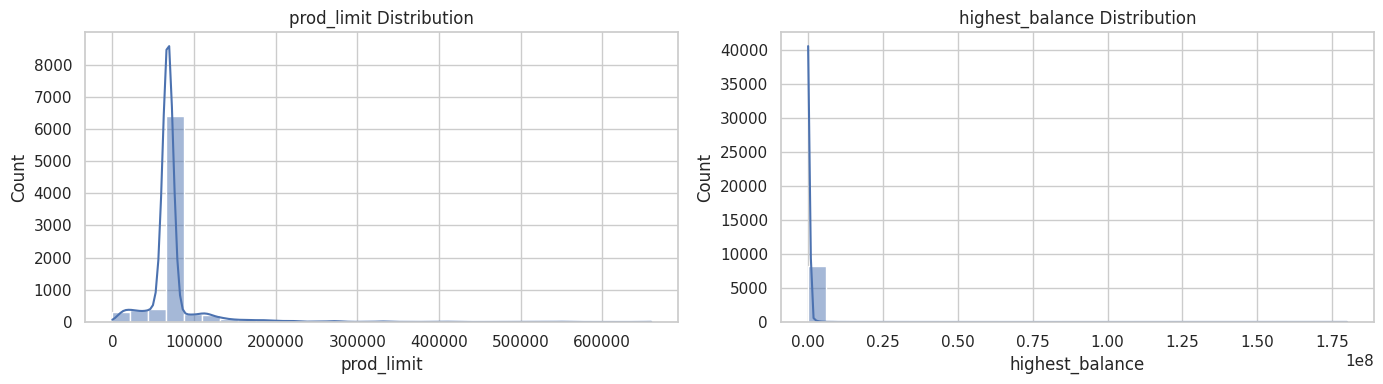

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['prod_limit'], kde=True, bins=30,ax=axes[0])
axes[0].set_title("prod_limit Distribution")

sns.histplot(df['highest_balance'], kde=True, bins=30,ax=axes[1])
axes[1].set_title("highest_balance Distribution")

plt.tight_layout()
plt.show()

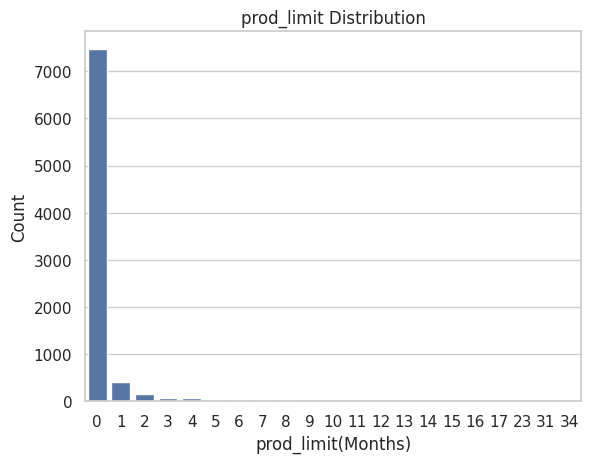

In [44]:
sns.countplot(x='OVD_t1',data=df)
plt.title("prod_limit Distribution")
plt.xlabel("prod_limit(Months)")
plt.ylabel("Count")
plt.show()

In [47]:
df['default'] = ((df['OVD_t1'] > 0) | (df['OVD_t2'] > 0) | (df['OVD_t3'] > 0) | (df['OVD_sum'] > 0)).astype(int)
display(df.head())

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,default
0,58987402,0,0,0,0,1,10,16500.0,2016-12-04,0.0,44047.0,2015-09-21,0
1,58995151,0,0,0,0,1,5,68200.0,2016-12-04,588720.0,491100.0,2015-09-21,0
2,58997200,0,0,0,0,2,5,68200.0,2016-12-04,840000.0,700500.0,2016-04-22,0
3,54988608,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25,0
4,54987763,0,0,0,0,2,10,68200.0,2016-12-03,15147.6,44047.0,2016-04-26,0


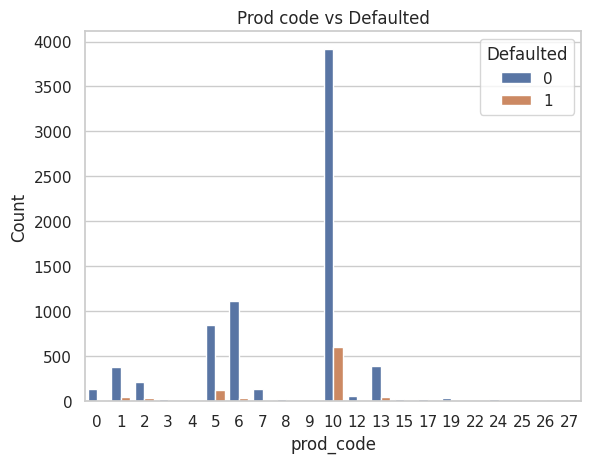

In [48]:
sns.countplot(x='prod_code', hue='default',data=df)
plt.title("Prod code vs Defaulted")
plt.xlabel("prod_code")
plt.ylabel("Count")
plt.legend(title='Defaulted')
plt.show()

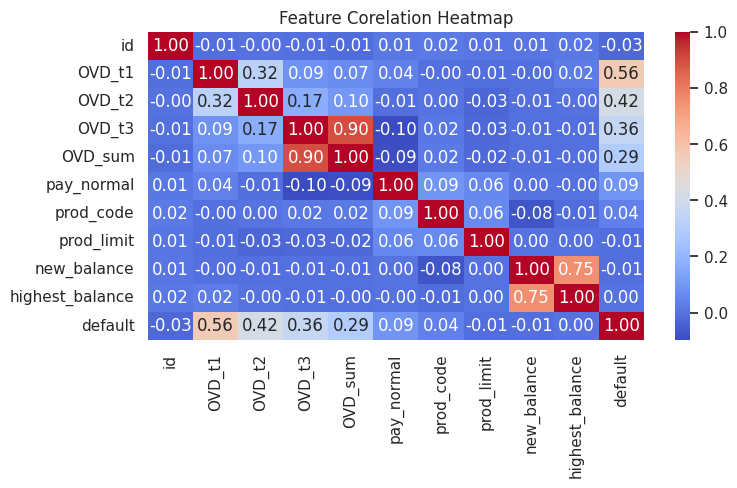

In [50]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Corelation Heatmap")
plt.show()

In [53]:
df['prod_code_binary'] = df['prod_code'].apply(lambda x:1 if x == 60 else 0)

In [56]:
import numpy as np
df['log_highest_balance'] = np.log1p(df['highest_balance'])
df['log_prod_limit'] = np.log1p(df['prod_limit'])

In [57]:
features = ['log_highest_balance','log_prod_limit']
target = 'defaulted'

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_features = ['log_prod_limit','log_highest_balance']
df[scale_features] =  scaler.fit_transform(df[scale_features])
df.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date,default,prod_code_binary,log_highest_balance,log_prod_limit
0,58987402,0,0,0,0,1,10,16500.0,2016-12-04,0.0,44047.0,2015-09-21,0,0,-0.081525,-3.004994
1,58995151,0,0,0,0,1,5,68200.0,2016-12-04,588720.0,491100.0,2015-09-21,0,0,1.673149,0.060535
2,58997200,0,0,0,0,2,5,68200.0,2016-12-04,840000.0,700500.0,2016-04-22,0,0,1.931577,0.060535
3,54988608,0,0,0,0,3,10,37400.0,2016-12-03,8425.2,7520.0,2016-04-25,0,0,-1.367735,-1.237282
4,54987763,0,0,0,0,2,10,68200.0,2016-12-03,15147.6,44047.0,2016-04-26,0,0,-0.081525,0.060535


In [66]:
from sklearn.model_selection import train_test_split
x = df[features]
y = df['default']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [78]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForesstClassifer": RandomForestClassifier(n_estimators=100,random_state=42)
}

In [93]:
for name, model in models.items():
    print(f"\nModel: {name}")
    pipeline = Pipeline([
        ('classifier', model)
    ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



Model: LogisticRegression
Accuracy: 0.8958
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1478
           1       0.00      0.00      0.00       172

    accuracy                           0.90      1650
   macro avg       0.45      0.50      0.47      1650
weighted avg       0.80      0.90      0.85      1650


Model: DecisionClassifier
Accuracy: 0.8442
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1478
           1       0.20      0.17      0.18       172

    accuracy                           0.84      1650
   macro avg       0.55      0.55      0.55      1650
weighted avg       0.83      0.84      0.84      1650


Model: RandomForesstClassifer
Accuracy: 0.8521
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1478
           1       0.20      0.1